In [1]:
# iPhone Film Emulator - Inference Examples
# This notebook demonstrates how to use the new FilmEmulator API

import sys
import os
from pathlib import Path

# Check and install dependencies if needed
def check_dependencies():
    """Check if required packages are available and provide install instructions"""
    missing = []
    try:
        import torch
    except ImportError:
        missing.append("torch")
    
    try:
        import torchvision
    except ImportError:
        missing.append("torchvision")
    
    try:
        import skimage
    except ImportError:
        missing.append("scikit-image")
    
    if missing:
        print("❌ Missing required packages:", ", ".join(missing))
        print("💡 Install them with:")
        print(f"   pip install {' '.join(missing)}")
        print("   OR")
        print("   pip install -r ../requirements.txt")
        return False
    return True

if not check_dependencies():
    print("⚠️ Please install the required packages before continuing")
else:
    # Add src directory to path
    sys.path.insert(0, str(Path.cwd().parent / "src"))
    
    try:
        from film_emulator import FilmEmulator, FILM_STOCKS, soft_blend, apply_grain
        import skimage.io as skio
        import cv2
        from PIL import Image
        import skimage
        import numpy as np
        import matplotlib.pyplot as plt
        
        %load_ext autoreload
        %autoreload 2
        
        print("✅ iPhone Film Emulator loaded successfully!")
        print("Available film stocks:", list(FilmEmulator.available_stocks().keys()))
        
    except Exception as e:
        print(f"❌ Import error: {e}")
        print("💡 Make sure you're running this from the examples/ directory")
        print("💡 And that all dependencies are installed")

✅ iPhone Film Emulator loaded successfully!
Available film stocks: ['vision3500t', 'ektar100', 'gold200', 'portra400']


Using device: mps
----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: dummy                         	[default: None]
             dataset_mode: single                        	[default: unaligned]
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: -1                            	[default: 0]
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
    

/Users/yahyarahhawi/miniforge3/envs/ml/lib/python3.12/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: divide by zero encountered in matmul
  return rgb @ coeffs
/Users/yahyarahhawi/miniforge3/envs/ml/lib/python3.12/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: overflow encountered in matmul
  return rgb @ coeffs
/Users/yahyarahhawi/miniforge3/envs/ml/lib/python3.12/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: invalid value encountered in matmul
  return rgb @ coeffs


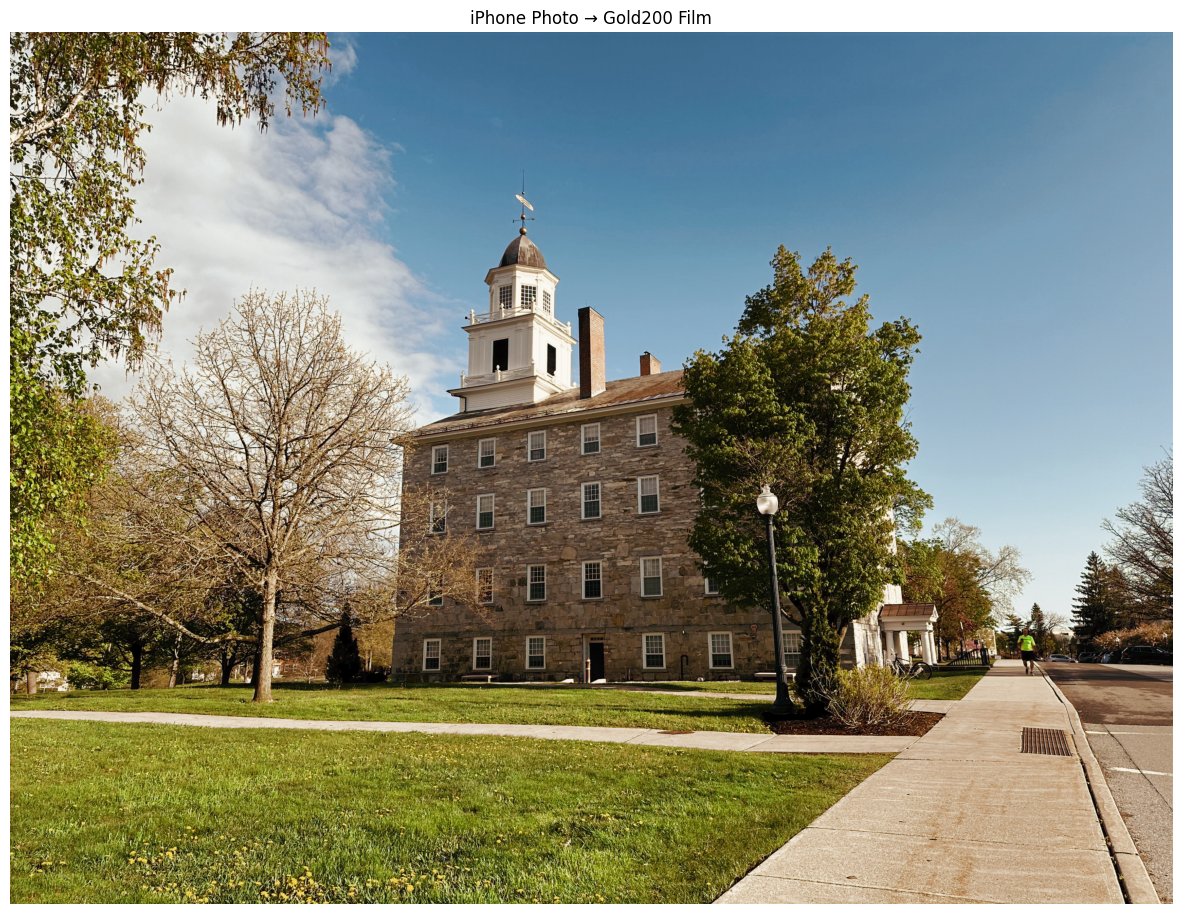

In [5]:
# Initialize the film emulator
emulator = FilmEmulator(device="auto")
print(f"Using device: {emulator.device}")

# Example image transformation using new API
img_path = "images/7.jpeg"
film_stock = "gold200"  # Updated to use lowercase naming

# Transform the image
result = emulator.transform(
    img_path, 
    film_stock=film_stock,
    strength=1.0,
    resize_to=4096,
    version="v1" # Use one of ["v1", "v2", "v3"] to specify the model version
)

# Save and display result
skio.imsave("result.jpg", result)
plt.figure(figsize=(15, 15))
plt.imshow(result)
plt.axis('off')
plt.title(f"iPhone Photo → {film_stock.title()} Film")
plt.show()